In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:

df = pd.read_csv("workout_fitness_tracker_data.csv")

In [11]:
print(df.columns.tolist())

['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout']


In [12]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [14]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [15]:
# Encode categorical variables
categorical_cols = ['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout', 'Mood After Workout']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use


In [16]:
# Define target and features
X = df.drop(columns=['Calories Burned'])
y = df['Calories Burned']

In [17]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


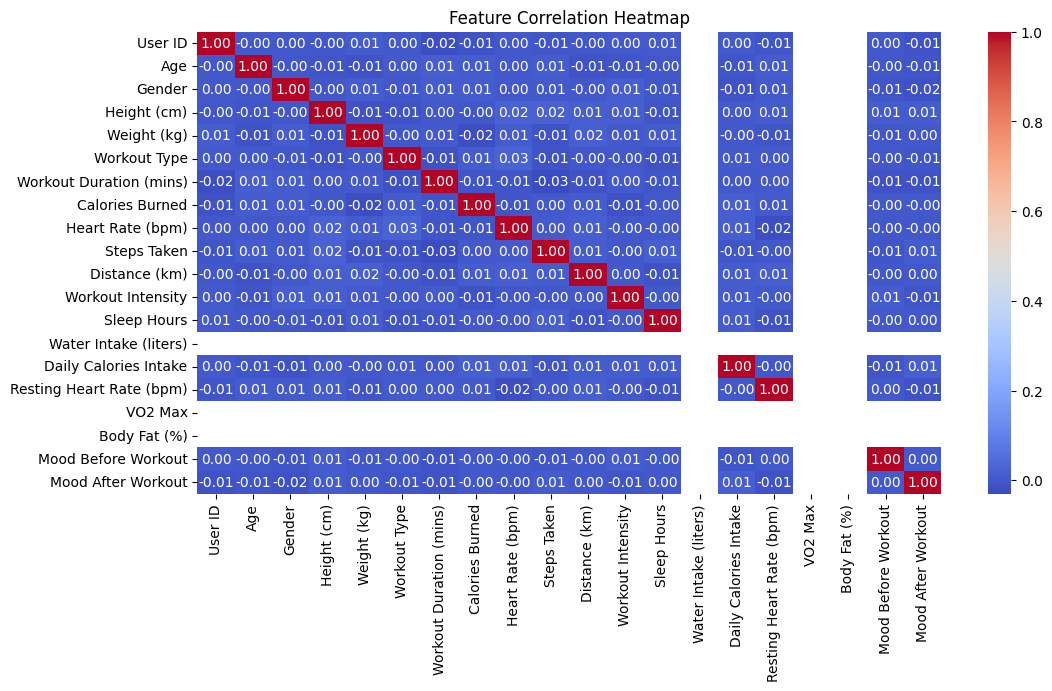

In [19]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

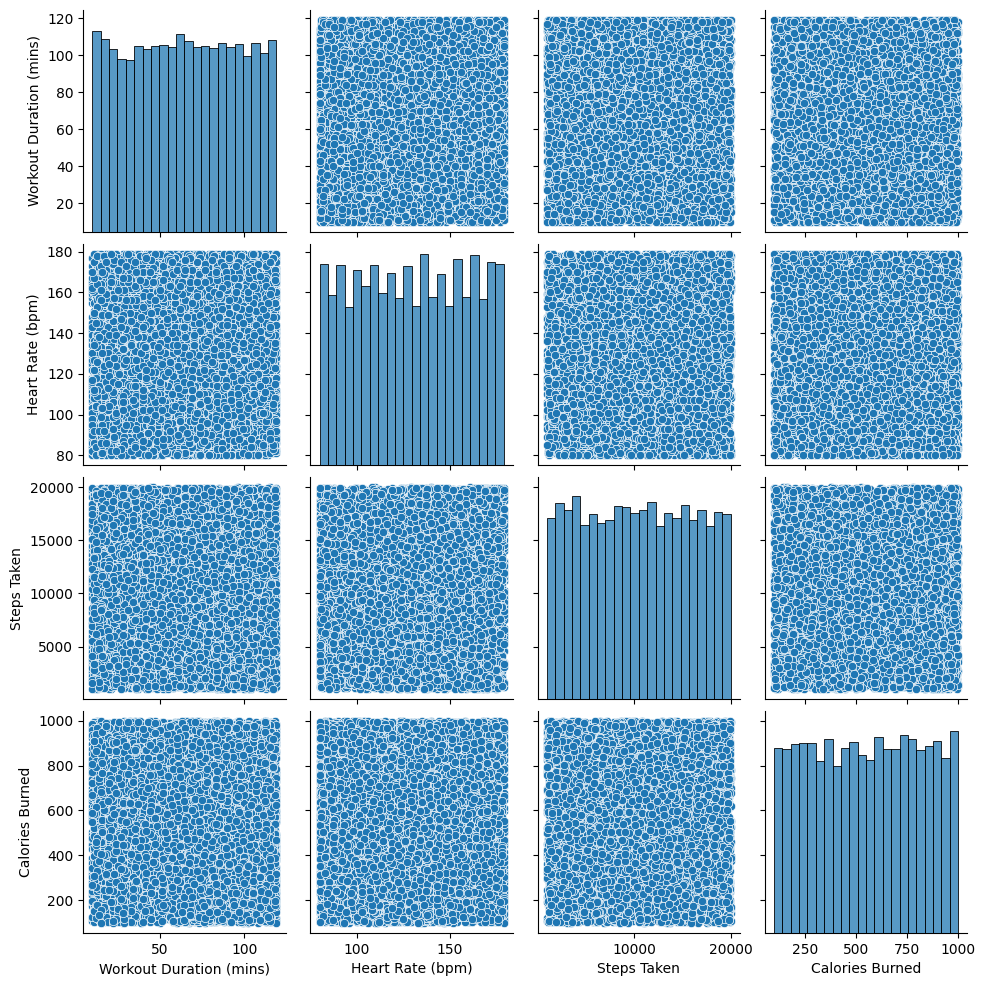

In [20]:
sns.pairplot(df[['Workout Duration (mins)', 'Heart Rate (bpm)', 'Steps Taken', 'Calories Burned']])
plt.show()

In [22]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred_lr = lr.predict(X_test_scaled)

In [24]:
# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}")


Linear Regression - R2: -0.0049, MSE: 68968.2670, MAE: 227.9525


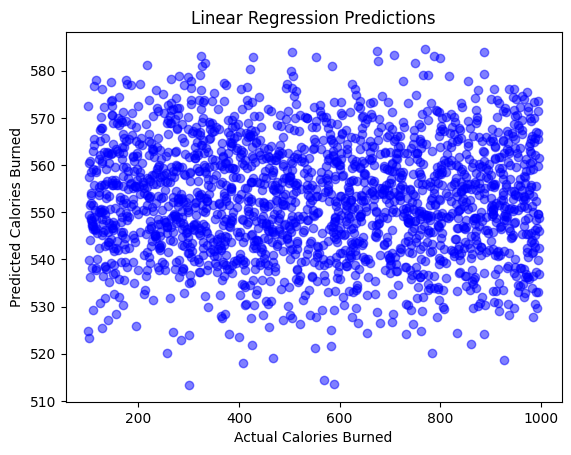

In [25]:
# Scatter plot
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Linear Regression Predictions")
plt.show()


In [27]:
# --- Polynomial Regression ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)

In [28]:
X_test_poly = poly.transform(X_test_scaled)

In [29]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
y_pred_poly = lr_poly.predict(X_test_poly)


In [31]:
# Metrics
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression - R2: {r2_poly:.4f}, MSE: {mse_poly:.4f}, MAE: {mae_poly:.4f}")

Polynomial Regression - R2: -0.0258, MSE: 70401.4885, MAE: 229.0530


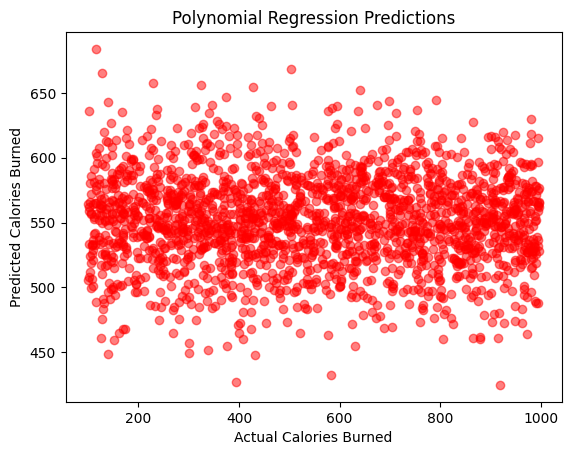

In [32]:
# Scatter plot
plt.scatter(y_test, y_pred_poly, color='red', alpha=0.5)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Polynomial Regression Predictions")
plt.show()